In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Read in Alzheimer Prediction Dataset
df = pd.read_csv("alzheimers_prediction_dataset.csv")
# View first 5 Entries
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [3]:
print(df.shape) 
df.info()

(74283, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Fam

In [ ]:
# View if missnig
df.isna().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe(include='object')

,Country,Gender,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Depression Level,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
count,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,...,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283
unique,20,2,3,3,3,2,2,2,2,3,...,3,3,3,3,2,3,3,3,2,2
top,Brazil,Female,High,Current,Never,No,No,Normal,No,Medium,...,Average,High,Unemployed,Single,No,Medium,Low,Medium,Rural,No
freq,3839,37249,24853,24915,24865,59527,52134,51973,52004,24843,...,24917,24906,24801,25169,59561,24859,24873,24886,37203,43570


In [ ]:
# Add categorical values to dictionary to view categories of all columns
categories = {}

for col in list(df.select_dtypes(include='object').columns):
    categories.update({col : list(df[col].value_counts().index)})

categories


{'Country': ['Brazil',
  'Germany',
  'Australia',
  'Russia',
  'South Africa',
  'Japan',
  'India',
  'South Korea',
  'Argentina',
  'Italy',
  'Canada',
  'France',
  'Norway',
  'Spain',
  'Sweden',
  'Saudi Arabia',
  'UK',
  'USA',
  'Mexico',
  'China'],
 'Gender': ['Female', 'Male'],
 'Physical Activity Level': ['High', 'Low', 'Medium'],
 'Smoking Status': ['Current', 'Never', 'Former'],
 'Alcohol Consumption': ['Never', 'Regularly', 'Occasionally'],
 'Diabetes': ['No', 'Yes'],
 'Hypertension': ['No', 'Yes'],
 'Cholesterol Level': ['Normal', 'High'],
 'Family History of Alzheimer’s': ['No', 'Yes'],
 'Depression Level': ['Medium', 'Low', 'High'],
 'Sleep Quality': ['Good', 'Average', 'Poor'],
 'Dietary Habits': ['Average', 'Healthy', 'Unhealthy'],
 'Air Pollution Exposure': ['High', 'Medium', 'Low'],
 'Employment Status': ['Unemployed', 'Employed', 'Retired'],
 'Marital Status': ['Single', 'Married', 'Widowed'],
 'Genetic Risk Factor (APOE-ε4 allele)': ['No', 'Yes'],
 'Social 

In [6]:
df.iloc[:, 5:25].head()


,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Medium,Never,Occasionally,No,No,Normal,No,90,Low,Poor,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Medium,Former,Never,No,No,Normal,No,65,Low,Good,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,High,Current,Occasionally,No,Yes,Normal,No,43,High,Good,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,Low,Never,Regularly,Yes,No,Normal,No,81,Medium,Average,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,High,Former,Never,Yes,No,Normal,No,49,High,Poor,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [18]:
# Dropping Variables 
df_alz = df.drop(['Education Level', 'Employment Status', 'Marital Status', 'Country',
                  'Physical Activity Level', 'Depression Level', 'Sleep Quality', 'Social Engagement Level',
                  'Stress Levels', 'Urban vs Rural Living', 'Income Level', 'Air Pollution Exposure', 'Dietary Habits'], axis=1)

df_alz.head()

,Age,Gender,BMI,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Genetic Risk Factor (APOE-ε4 allele),Alzheimer’s Diagnosis
0,90,Male,33.0,Never,Occasionally,No,No,Normal,No,90,No,No
1,72,Male,29.9,Former,Never,No,No,Normal,No,65,No,No
2,86,Female,22.9,Current,Occasionally,No,Yes,Normal,No,43,No,No
3,53,Male,31.2,Never,Regularly,Yes,No,Normal,No,81,No,No
4,58,Female,30.0,Former,Never,Yes,No,Normal,No,49,No,No


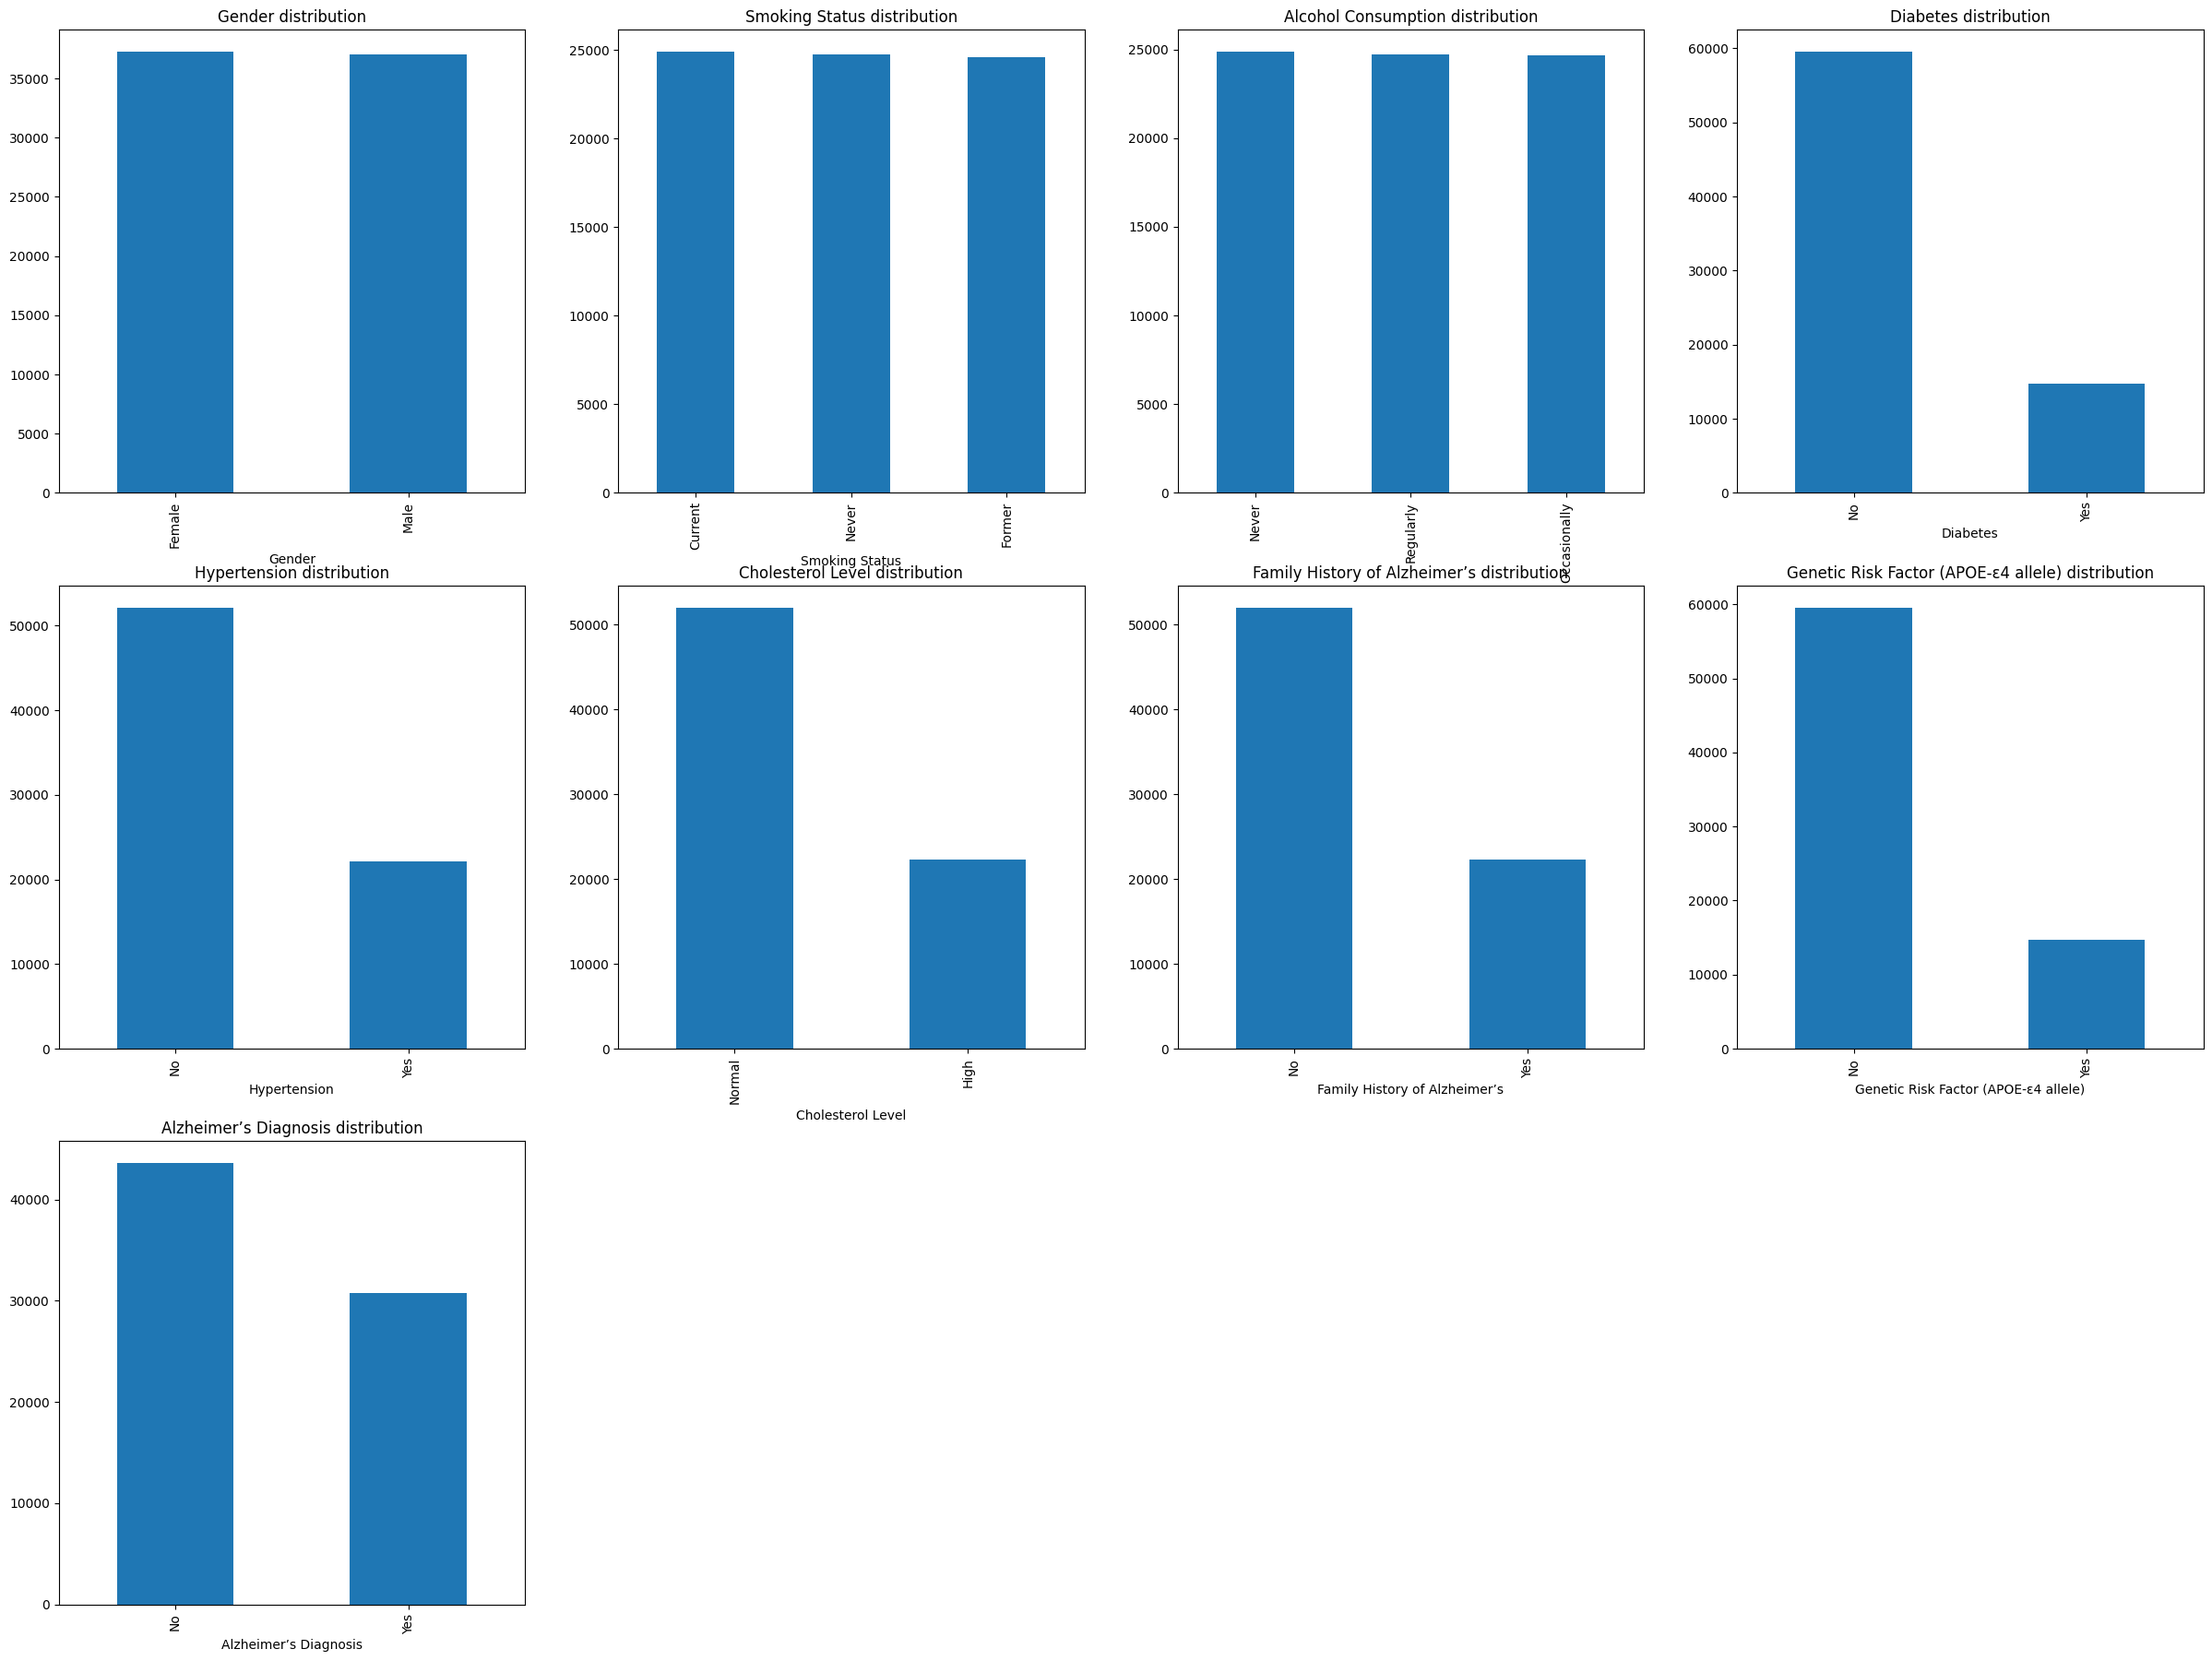

In [19]:
columns = list(df_alz.select_dtypes(include='object').columns)

plt.figure(figsize=(30, 30))
for i, cols in enumerate(columns, start=1):
    plt.subplot(4, 4, i)
    df_alz[cols].value_counts().plot(kind='bar')
    
    plt.title(f"{cols} distribution") 


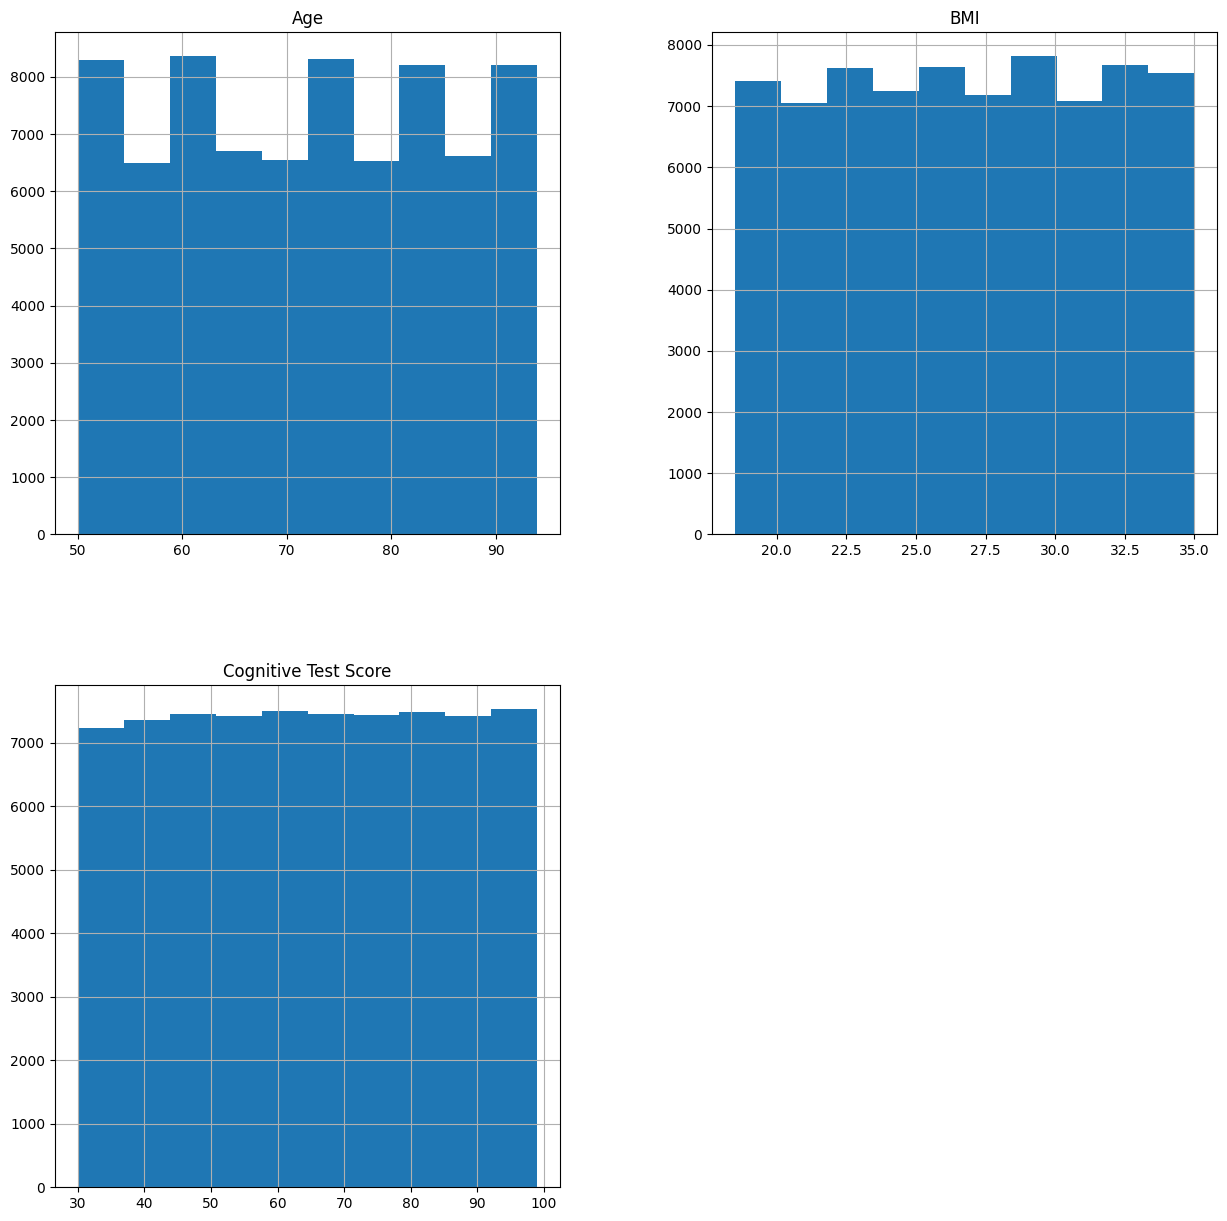

In [17]:
df[list(df_alz.select_dtypes(exclude='object'))].hist(figsize=(15, 15))
plt.show()

In [ ]:
group = df_alz.groupby('Alzheimer’s Diagnosis')['Gender'].value_counts()

group


<bound method Series.reset_index of Alzheimer’s Diagnosis  Gender
No                     Female    21873
                       Male      21697
Yes                    Female    15376
                       Male      15337
Name: count, dtype: int64>

In [ ]:
columns = list(df_alz.select_dtypes(include='object').columns).remove('Alzheimer’s Diagnosis')


plt.figure(figsize=(30, 30))
for i, cols in enumerate(columns, start=1):
    plt.subplot(4, 4, i)
    df_alz[cols].value_counts().plot(kind='bar')
    
    plt.title(f"{cols} distribution") 